(-0.5, 179.5, 283.5, -0.5)

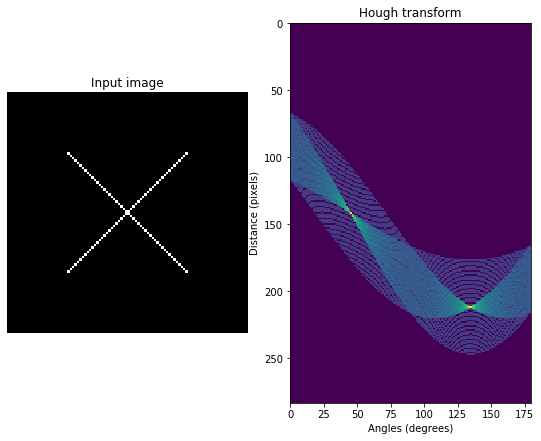

In [2]:
import skimage.transform as st
import numpy as np
import matplotlib.pyplot as plt

# 构建测试图片
image = np.zeros((100, 100))  #背景图
idx = np.arange(25, 75)    #25-74序列
image[idx[::-1], idx] = 255  # 线条\
image[idx, idx] = 255        # 线条/

# hough线变换
h, theta, d = st.hough_line(image)

#生成一个一行两列的窗口（可显示两张图片）.
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 6))
plt.tight_layout()

#显示原始图片
ax0.imshow(image, plt.cm.gray)
ax0.set_title('Input image')
ax0.set_axis_off()

#显示hough变换所得数据
ax1.imshow(np.log(1 + h))
ax1.set_title('Hough transform')
ax1.set_xlabel('Angles (degrees)')
ax1.set_ylabel('Distance (pixels)')
ax1.axis('image')

(0, 100, 100, 0)

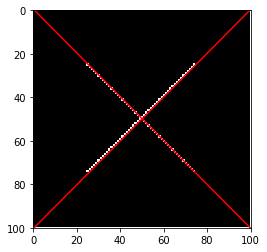

In [7]:
plt.imshow(image, plt.cm.gray)
row1, col1 = image.shape
for _, angle, dist in zip(*st.hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - col1 * np.cos(angle)) / np.sin(angle)
    plt.plot((0, col1), (y0, y1), '-r')
plt.axis((0, col1, row1, 0))
#plt.set_title('Detected lines')
#plt.set_axis_off()

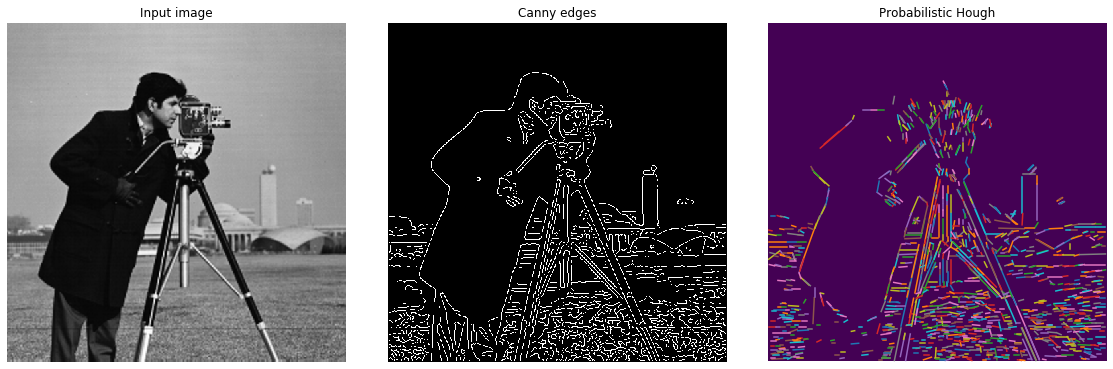

In [8]:
#概率霍夫线变换
import skimage.transform as st
import matplotlib.pyplot as plt
from skimage import data,feature

#使用Probabilistic Hough Transform.
image = data.camera()
edges = feature.canny(image, sigma=2, low_threshold=1, high_threshold=25)
lines = st.probabilistic_hough_line(edges, threshold=10, line_length=5,line_gap=3)

# 创建显示窗口.
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16, 6))
plt.tight_layout()

#显示原图像
ax0.imshow(image, plt.cm.gray)
ax0.set_title('Input image')
ax0.set_axis_off()

#显示canny边缘
ax1.imshow(edges, plt.cm.gray)
ax1.set_title('Canny edges')
ax1.set_axis_off()

#用plot绘制出所有的直线
ax2.imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax2.plot((p0[0], p1[0]), (p0[1], p1[1]))
row2, col2 = image.shape
ax2.axis((0, col2, row2, 0))
ax2.set_title('Probabilistic Hough')
ax2.set_axis_off()
plt.show()